In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mX = [
        [
            [10, 2, -6],
            [-1, 4, 2],
            [2, 3, 6]
        ],
        [
            [-5, 2, -8],
            [4, -3, -9],
            [-8, -10, 9]
        ],
        [
            [10, -5, 3, 0],
            [3, -9, 2, -2],
            [-8, 0, 17, -4],
            [3, -3, -8, -15]
        ],
]

mY = [
    [17, -4, -12],
    [13, -7, -2],
    [9, 10, -10, -18]
]

In [ ]:
#SOAL 1
#DIAGONALLY DOMINANT

def checkDD(matrix):
  x = np.array(matrix)
  diag = np.diag(np.abs(x))
  sumWithoutDiag = np.sum(np.abs(x), 1) - diag


  if np.all(diag > sumWithoutDiag):
    return True
  else:
    return False
  
for i,(x) in enumerate ((mX)):
  if (checkDD(x)):
    print("DIagonall")
  else:
    print("Not diagonall")

DIagonall
Not diagonall
DIagonall


In [ ]:
# SOAL 2

def DiagonallyDominant(matrix):
  x = np.array(matrix)
  diag = np.diag(np.abs(x))
  sumWithoutDiag = np.sum(np.abs(x), 1) - diag

  if np.all(diag > sumWithoutDiag):
    return True
  else:
    return False

In [ ]:
def getEquation(a, b):
  a = np.array(a)
  b = np.array(b)

  diag = np.diag(a)
  a = -a

  for i, el in enumerate(a):
    print(f'X{i} = ({b[i]})', end='')
    for j, el2 in enumerate(el):
      if i!=j:
        print(f' + ({el2}X{j+1})', end='')
    
    print(f' ) / {diag[i]}')

In [ ]:
def gaussSeidel(a, b):
  a = np.array(a)
  b = np.array(b)

  diag = np.diag(a)
  a = -a
  np.fill_diagonal(a, 0)
  oldVal = np.zeros(a.shape[0])

  for i in range(5):
    newVal = np.array(oldVal)

    for j, el in enumerate(a):
      newVal[j] = (b[j] + np.dot(el, newVal)) / diag[j]
    
    print(f'iteration: {i+1}|', end='')
    for j, el in enumerate(newVal):
      print(f' X{j+1} = {el: .8f}', end='')
    
    print()
    dist = np.sqrt(np.dot(newVal-oldVal, newVal-oldVal))
    oldVal = newVal 
    if dist < 0.01456:
      print('Converged!')
      print('Result:')
      print(f'X1 = {newVal[0]}')
      print(f'X2 = {newVal[1]}')
      print(f'X1 = {newVal[2]}')
      return
  print("Not Converged")
  return

In [ ]:
for i, (x,y) in enumerate(zip(mX, mY)):
  print('=============================')
  print(f'Equation {i+1}')
  if(DiagonallyDominant(x)):
    print("Diagonally Dominant")
    # getEquation(x,y)
    gaussSeidel(x, y)
  else:
    print("Not Diagonally Dominant")
  print()

Equation 1
Diagonally Dominant
iteration: 1| X1 =  1.70000000 X2 = -0.57500000 X3 = -2.27916667
iteration: 2| X1 =  0.44750000 X2 =  0.25145833 X3 = -2.27489583
iteration: 3| X1 =  0.28477083 X2 =  0.20864062 X3 = -2.19924392
iteration: 4| X1 =  0.33872552 X2 =  0.18430334 X3 = -2.20506018
iteration: 5| X1 =  0.34010322 X2 =  0.18755590 X3 = -2.20714569
Converged!
Result:
X1 = 0.34010322482638883
X2 = 0.18755589518229154
X1 = -2.207145689199942

Equation 2
Not Diagonally Dominant

Equation 3
Diagonally Dominant
iteration: 1| X1 =  0.90000000 X2 = -0.81111111 X3 = -0.16470588 X4 =  1.63006536
iteration: 2| X1 =  0.54385621 X2 = -1.32866376 X3 =  0.05124183 X4 =  1.54717502
iteration: 3| X1 =  0.22029557 X2 = -1.37010885 X3 = -0.12052561 X4 =  1.58236121
iteration: 4| X1 =  0.25110326 X2 = -1.40582932 X3 = -0.09774877 X4 =  1.58351919
iteration: 5| X1 =  0.22640997 X2 = -1.40925622 X3 = -0.10909667 X4 =  1.58531813
Not Converged



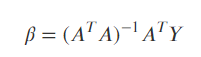

[[ 6.13333333]
 [23.66666667]]


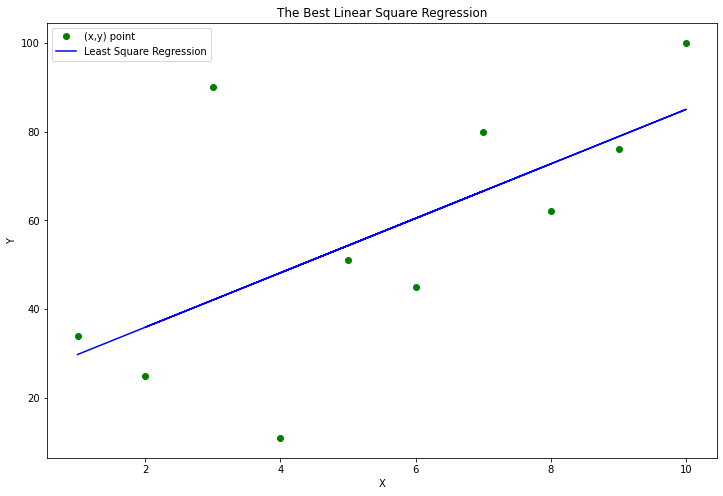

In [ ]:
# SOAL 3  
# LEAST SQUARE REGRESSION

lx = [1, 5, 7, 2, 3, 9, 10, 4, 6, 8]
ly = [34, 51, 80, 25, 90, 76, 100, 11, 45, 62]

lx = np.array(lx)
ly = np.array(ly)

A = np.vstack([lx, np.ones(len(lx))]).T
Y = np.vstack(ly)
beta = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), Y)
print(beta)

# [[ 6.13333333] -> m
 # [23.66666667]] -> c
m = beta[0]
c = beta[1]

# y = mx + c
y = m * lx + c
plt.figure(figsize = (12, 8))
plt.plot(lx, ly, 'go', label = "(x,y) point")
plt.plot(lx, y, '-b',  label = "Least Square Regression")
plt.title('The Best Linear Square Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# SOAL 4
# NEWTON RHAPSON

from sympy import *

x = symbols('x')
f1 = lambda x: 7*x**4 - 3*x**2 + x
df1 = diff(f1(x), x)
df1 = lambdify(x, df1, 'numpy')

f2 = lambda x: 8*x**6 + 5*x**4 - 2 
df2 = diff(f2(x), x)
df2 = lambdify(x, df2, 'numpy')

def newton_raphson(f, df, x0, tolerance, max):
  if max==0:
    print('Max Iteration Reached!')
    return False

  if np.abs(f(x0)) < tolerance:
    print(f'{f1}')
    print(f2)
    print(df1)
    print(df2)
    print(x0)
    return True
  else:
    xNew = x0 - (f(x0)/ df(x0))
    return newton_raphson(f, df, xNew, tolerance, max-1)

newton_raphson(f1, df1, 1, 0.006541, 5)

newton_raphson(f2, df2, 1, 0.006541, 5)

Max Iteration Reached!
<function <lambda> at 0x7f63d9188e50>
0.6903195287760319


True

In [ ]:
# SOAL 5
# RIEMANN

def f(x):
  return 3*x**4 - 7*x**2 + 5

In [ ]:
a = -4
b = 3
n = 30

boxWidth = (b-a)/(n-1)

x = np.linspace(a, b, n)

#Left Riemann
xLeft = x[ :-1]
yLeft = f(xLeft)
leftRiemann = boxWidth * np.sum(np.abs(yLeft))
print("Left Riemann:", leftRiemann)


#Right Riemann
xRight = x[1:]
yRight = f(xRight)
rightRiemann = boxWidth * np.sum(np.abs(yRight))
print("Right Riemann:", rightRiemann)

#Mid Riemann
xMid = (xLeft + xRight)/2
yMid = f(xMid)
midRiemann = boxWidth * np.sum(np.abs(yMid))
print("Mid Point Riemann:", midRiemann)

#Trapezoid
trapezoid = np.sum(np.abs(yLeft) + np.abs(yRight))/2 * boxWidth
print("Trapezoid:", trapezoid)


Left Riemann: 645.1387652149571
Right Riemann: 530.2422134908192
Mid Point Riemann: 580.4556464297783
Trapezoid: 587.690489352888
